In [2]:
# This code is used to get tweets containing the keyword 'Barcelona' 
## Date: 25th March 2017
## Starting time: 16:35h GMT+1
## Ending time: 17:35h GMT+1
## Tweets retrieved: 4181 (22MB)
import tweepy
from tweepy import OAuthHandler

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('BarcelonaTweets.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['Barcelona'])

KeyboardInterrupt: 

In [3]:
# First read to check the content of the tweets we are getting
import json  
with open('BarcelonaTweets.json','r') as json_file:
         for line in json_file:
             tweet = json.loads(line)
             print tweet["text"]

Holland llegando al  Showtime en Barcelona hoy. https://t.co/FZbkxqUTe4
Barcelona https://t.co/57BGZfAQa9
Activitat familiar per diumenge al matí...
https://t.co/MB62V3Toam
RT @TSBible: Barcelona Confirm Club’s New Training Ground Will Be Named After Johan Cruyff... https://t.co/02qzWtOuXf https://t.co/rss0LMca…
💚🛌🛀 Our rooms offer you comfort, magical views and loads of hour of sleep https://t.co/VZliBM8IBg  #Barcelona https://t.co/cyOOzavuk6
RT @messi10stats: BREAKING: Barcelona release official statement regarding Luis Enrique’s successor! https://t.co/aS6pqa6N2N https://t.co/5…
RT @CCCBAudiovisual: 25/3 David Guzmán presenta @riusdetinta programa de @beteve de Barcelona i la seva literatura #CanalAlfa #Kosmopolis h…
RT @lagarpic: Barcelona, Spain 🇪🇸 https://t.co/eIzSyJWHee
RT @messi10stats: Official: Barcelona will erect a statue of Johan Cruyff in the New Camp Nou. https://t.co/DYupO166gs
En cuanto llegue a Barcelona le cambio el nombre a la calle y planto… https://t.co/3ggW0SBlGH

In [4]:
# This is how it looks the first tweet I got in JSON format
import json
 
with open('BarcelonaTweets.json', 'r') as f:
    line = f.readline() 
    tweet = json.loads(line) 
    print(json.dumps(tweet, indent=4)) 

{
    "contributors": null, 
    "truncated": false, 
    "text": "Holland llegando al  Showtime en Barcelona hoy. https://t.co/FZbkxqUTe4", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "id": 845656578325987330, 
    "favorite_count": 0, 
    "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "timestamp_ms": "1490455214469", 
    "entities": {
        "user_mentions": [], 
        "symbols": [], 
        "hashtags": [], 
        "urls": [], 
        "media": [
            {
                "expanded_url": "https://twitter.com/HRArgentina_/status/845656578325987330/video/1", 
                "display_url": "pic.twitter.com/FZbkxqUTe4", 
                "url": "https://t.co/FZbkxqUTe4", 
                "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/845656387396997120/pu/img/OvCHdU1ojBhKtvgv.jpg", 
                "id_str": "845656387396997120", 
             

In [6]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

# This is the "preprocess" code from previous lab
# Let's have a look of the tokens we get (without filters)

with open('BarcelonaTweets.json', 'r') as f:
     for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        print(tokens)

[u'Holland', u'llegando', u'al', u'Showtime', u'en', u'Barcelona', u'hoy', u'.', u'https://t.co/FZbkxqUTe4']
[u'Barcelona', u'https://t.co/57BGZfAQa9']
[u'Activitat', u'familiar', u'per', u'diumenge', u'al', u'mat', u'\xed', u'.', u'.', u'.', u'https://t.co/MB62V3Toam']
[u'RT', u'@TSBible', u':', u'Barcelona', u'Confirm', u'Club', u'\u2019', u's', u'New', u'Training', u'Ground', u'Will', u'Be', u'Named', u'After', u'Johan', u'Cruyff', u'.', u'.', u'.', u'https://t.co/02qzWtOuXf', u'https://t.co/rss0LMca', u'\u2026']
[u'\U0001f49a', u'\U0001f6cc', u'\U0001f6c0', u'Our', u'rooms', u'offer', u'you', u'comfort', u',', u'magical', u'views', u'and', u'loads', u'of', u'hour', u'of', u'sleep', u'https://t.co/VZliBM8IBg', u'#Barcelona', u'https://t.co/cyOOzavuk6']
[u'RT', u'@messi10stats', u':', u'BREAKING', u':', u'Barcelona', u'release', u'official', u'statement', u'regarding', u'Luis', u'Enrique', u'\u2019', u's', u'successor', u'!', u'https://t.co/aS6pqa6N2N', u'https://t.co/5', u'\u2026']


In [9]:
# We can also check which ones are the 15 most common tokens easily
import operator 
import json
from collections import Counter

fname = 'BarcelonaTweets.json'
with open(fname, 'r') as f:
   count_all = Counter()
   for line in f:
       tweet = json.loads(line)
       # Create a list with all the terms
       terms_all = [term for term in preprocess(tweet['text'])]
       # Update the counter
       count_all.update(terms_all)
   print(count_all.most_common(15))

[(u':', 2611), (u'Barcelona', 2484), (u'.', 1960), (u'RT', 1874), (u'de', 1598), (u'a', 1356), (u',', 1342), (u'\u2026', 1282), (u'en', 918), (u'\xe1', 682), (u'y', 539), (u'\xed', 533), (u'\xf3', 531), (u'el', 513), (u'to', 499)]


In [23]:
# Obviously we need to filter some values, we create a 'stop' set.
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + stopwords.words('spanish') + punctuation + ['rt', 'via', 'RT']

[nltk_data] Downloading package stopwords to /home/eloy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
### We can choose between removing only the stop words but also getting only hashtags or also terms only (removing
### hashtags and mentions from our results), in this case I will use only the terms to check what's going on in Barcelona.
### I also needed to add the Spanish stopwords set since I was getting too much noise.
### Since today it is not a match day, I decided to get tweets for an hour to get some volume and get a good sample to
### analyze.
import operator 
import json
from collections import Counter
     
fname = 'BarcelonaTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        # List of hashtags
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#')]
        # To get words that are not hashtags or mentions
        terms_only = [term for term in preprocess(tweet['text']) if term not in stop and len(term) > 2 and not term.startswith(('#', '@'))] 
        count_all.update(terms_only)
    for word, index in count_all.most_common(15):
        print '%s : %s' % (word, index)

Barcelona : 2952
Cruyff : 540
Johan : 462
Nou : 240
Camp : 238
Madrid : 235
est : 194
amp : 193
statue : 185
gran : 177
Hipercor : 175
homenaje : 174
ctimas : 165
Spain : 164
difamaci : 151


In [26]:
import operator 
import json
from collections import Counter
 
fname = 'BarcelonaTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_only = [term for term in preprocess(tweet['text']) if term not in stop and len(term) > 2 and not term.startswith(('#', '@'))]      
        count_all.update(terms_only)
# Print the first 10 most frequent words
print(count_all.most_common(15))

[(u'Barcelona', 2952), (u'Cruyff', 540), (u'Johan', 462), (u'Nou', 240), (u'Camp', 238), (u'Madrid', 235), (u'est', 194), (u'amp', 193), (u'statue', 185), (u'gran', 177), (u'Hipercor', 175), (u'homenaje', 174), (u'ctimas', 165), (u'Spain', 164), (u'difamaci', 151)]


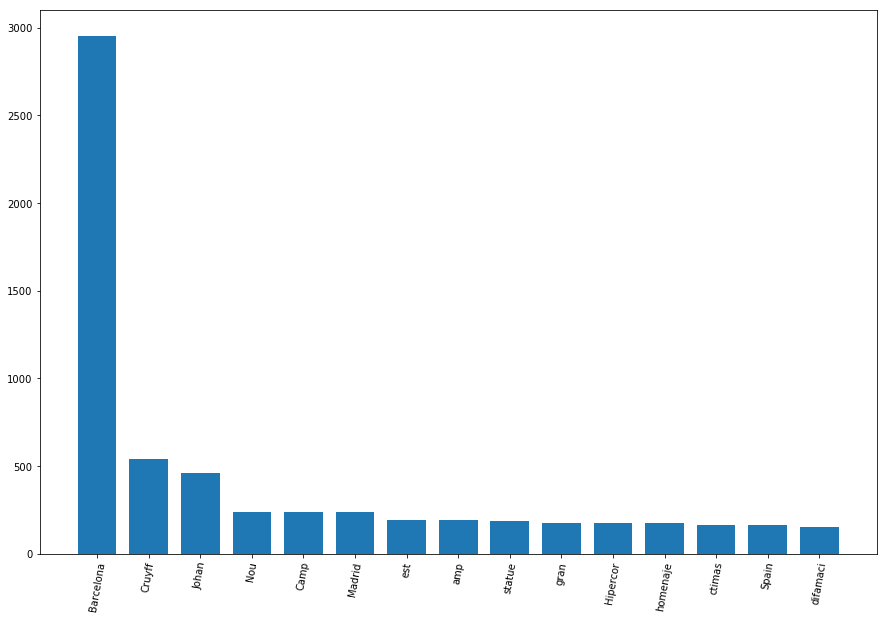

In [27]:
### We use this data to plot it and see that the most relevant event that seems to be happening in Barcelona today is
### the fact that F.C. Barcelona is honoring and decided to use the name of Johan Cruyff for their new 'Miniestadi'.
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight'); 